# Laboratorio 2 Machine Learning Avanzado - Red Neuronal LSTM

## Integrantes

- Sebastián Gacitúa
- Bastián Guzmán
- Jose Zamora
- Leandro Aroca
- Matthias Clein

## Librerías

In [118]:
!pip install scikit-image

In [210]:
import numpy as np
from skimage import io, color
from skimage.transform import resize
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense, LSTM, Embedding, Bidirectional

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, RobustScaler
from keras import models, optimizers, regularizers
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD, Adam, RMSprop



## Imagenes

### Carga y lectura de imagenes

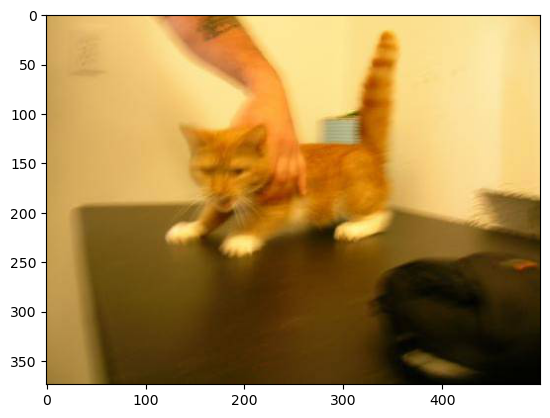

(374, 500, 3)


In [120]:
image = io.imread("./lab2_MLA_LSTM-main/train (1)/train/cat.0.jpg")
plt.imshow(image)
plt.show()
print(image.shape)
#image = io.imread("../data/dogs-vs-cats/train/cat.0.jpg")
#C:\Users\leand\Desktop\lab2_MLA_LSTM-main

In [164]:
def generate_data(num_images):
    images = []
    labels = []
    for i in range(0, num_images):
        path = "./lab2_MLA_LSTM-main/train (1)/train/cat.X.jpg"
        path = path.replace("X", str(i))
        image = io.imread(path)
        image = color.rgb2gray(image)
        image = resize(image, (200, 200), anti_aliasing = True)
        images.append(image)
        labels.append(0)

    for i in range(0, num_images):
        path = "./lab2_MLA_LSTM-main/train (1)/train/dog.X.jpg"
        path = path.replace("X", str(i))
        image = io.imread(path)
        image = color.rgb2gray(image)
        image = resize(image, (200, 200), anti_aliasing = True)
        images.append(image)
        labels.append(1)
    
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

In [165]:
images, labels = generate_data(100)

In [166]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2)

### Red Neuronal Convolucional

In [189]:
cnn_model = tf.keras.Sequential()
cnn_model.add(Conv2D(filters = 64, kernel_size = 2, padding = "same", activation = "relu", input_shape = (200, 200, 1)))
cnn_model.add(MaxPooling2D(pool_size = 2))
cnn_model.add(Dropout(0.3))
cnn_model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
cnn_model.add(MaxPooling2D(pool_size = 2))
cnn_model.add(Dropout(0.3))
cnn_model.add(Flatten())
cnn_model.add(Dense(256, activation = "relu"))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(1, activation = "sigmoid"))

In [190]:
cnn_model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_86 (Conv2D)          (None, 200, 200, 32)      160       
                                                                 
 max_pooling2d_86 (MaxPoolin  (None, 100, 100, 32)     0         
 g2D)                                                            
                                                                 
 dropout_125 (Dropout)       (None, 100, 100, 32)      0         
                                                                 
 conv2d_87 (Conv2D)          (None, 100, 100, 64)      8256      
                                                                 
 max_pooling2d_87 (MaxPoolin  (None, 50, 50, 64)       0         
 g2D)                                                            
                                                                 
 dropout_126 (Dropout)       (None, 50, 50, 64)      

In [191]:
cnn_model.compile(loss = "binary_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])

In [192]:
cnn_model.fit(X_train, y_train, batch_size = 20, epochs = 2, validation_split = 0.2)

Epoch 1/2
7/7 [==============================] - 4s 507ms/step - loss: 15.1351 - accuracy: 0.4844 - val_loss: 1.1133 - val_accuracy: 0.5000
Epoch 2/2
7/7 [==============================] - 3s 455ms/step - loss: 1.8447 - accuracy: 0.5391 - val_loss: 0.7575 - val_accuracy: 0.5000


In [193]:
cnn_model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 78ms/step - loss: 0.7370 - accuracy: 0.5250


[0.7369701266288757, 0.5249999761581421]

## Modelo 2
#### El Modelo 2 se compone de:

    - Capa de entrada con 32 neuronas y activación relu.
    - Capa de Dropout de un 30%.
    - Capa oculta de 64 neuronas y activación relu.
    - Capa de Dropout de un 30%.
    - Capa oculta de 128 neuronas y activación relu.
    - Capa de Dropout de un 30%.
    - Capa oculta de 128 neuronas y activación relu.
    - Capa de Dropout de un 30%.    
    - Capa oculta de 32 neuronas y activación relu.
    - Capa de salida con 1 neurona y activación softmax.
    - Función de pérdida: Binary Cross-Entropy.
    - Optimizador rmsprop

In [203]:
cnn_model_2 = tf.keras.Sequential()
cnn_model_2.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (200, 200, 1)))
cnn_model_2.add(MaxPooling2D(pool_size = 2))
cnn_model_2.add(Dropout(0.3))

cnn_model_2.add(Conv2D(filters = 64, kernel_size = 2, padding = "same", activation = "relu"))
cnn_model_2.add(MaxPooling2D(pool_size = 2))
cnn_model_2.add(Dropout(0.3))

cnn_model_2.add(Conv2D(filters = 128, kernel_size = 2, padding = "same", activation = "relu"))
cnn_model_2.add(MaxPooling2D(pool_size = 2))
cnn_model_2.add(Dropout(0.3))

cnn_model_2.add(Conv2D(filters = 128, kernel_size = 2, padding = "same", activation = "relu"))
cnn_model_2.add(MaxPooling2D(pool_size = 2))
cnn_model_2.add(Dropout(0.3))

cnn_model_2.add(Flatten())
cnn_model_2.add(Dense(512, activation = "relu"))
cnn_model_2.add(Dropout(0.5))
cnn_model_2.add(Dense(1, activation = "softmax"))
cnn_model_2.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_96 (Conv2D)          (None, 200, 200, 32)      160       
                                                                 
 max_pooling2d_96 (MaxPoolin  (None, 100, 100, 32)     0         
 g2D)                                                            
                                                                 
 dropout_138 (Dropout)       (None, 100, 100, 32)      0         
                                                                 
 conv2d_97 (Conv2D)          (None, 100, 100, 64)      8256      
                                                                 
 max_pooling2d_97 (MaxPoolin  (None, 50, 50, 64)       0         
 g2D)                                                            
                                                                 
 dropout_139 (Dropout)       (None, 50, 50, 64)      

In [204]:
cnn_model_2.compile(loss = "binary_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])

In [205]:
cnn_model_2.fit(X_train, y_train, batch_size = 20, epochs = 2, validation_split = 0.2)

Epoch 1/2
7/7 [==============================] - 7s 673ms/step - loss: 3.6292 - accuracy: 0.5078 - val_loss: 0.6985 - val_accuracy: 0.5000
Epoch 2/2
7/7 [==============================] - 3s 501ms/step - loss: 0.7112 - accuracy: 0.5078 - val_loss: 0.6939 - val_accuracy: 0.5000


In [202]:
cnn_model_2.evaluate(X_test, y_test)

2/2 [==============================] - 0s 40ms/step - loss: 0.6929 - accuracy: 0.4750


[0.6928572058677673, 0.4749999940395355]

### Red Neuronal LSTM

In [235]:
lstm_model = tf.keras.Sequential()
lstm_model.add(LSTM(64, input_shape = (200, 200)))
lstm_model.add(Dense(1))

In [236]:
lstm_model.summary()

Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 64)                67840     
                                                                 
 dense_109 (Dense)           (None, 1)                 65        
                                                                 
Total params: 67,905
Trainable params: 67,905
Non-trainable params: 0
_________________________________________________________________


In [237]:
lstm_model.compile(loss = "binary_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])

In [238]:
lstm_model.fit(X_train, y_train, batch_size = 20, epochs = 2, validation_split = 0.2)

Epoch 1/2
7/7 [==============================] - 5s 271ms/step - loss: 4.0137 - accuracy: 0.4688 - val_loss: 0.8675 - val_accuracy: 0.4688
Epoch 2/2
7/7 [==============================] - 1s 93ms/step - loss: 6.4237 - accuracy: 0.5312 - val_loss: 7.7125 - val_accuracy: 0.5000


In [239]:
lstm_model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 24ms/step - loss: 7.3268 - accuracy: 0.5250


[7.326849937438965, 0.5249999761581421]

### Modelo 2: LSTM

In [228]:
model_single_lstm = tf.keras.Sequential()
model_single_lstm.add(LSTM(64, input_shape = (200, 200)))
model_single_lstm.add(Dense(128, activation='relu'))
model_single_lstm.add(Dense(1, activation='sigmoid'))

model_single_lstm.summary()

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 64)                67840     
                                                                 
 dense_107 (Dense)           (None, 128)               8320      
                                                                 
 dense_108 (Dense)           (None, 1)                 129       
                                                                 
Total params: 76,289
Trainable params: 76,289
Non-trainable params: 0
_________________________________________________________________


In [232]:
model_single_lstm.compile(optimizer = Adam(),  loss = 'binary_crossentropy',   metrics = 'accuracy')

In [233]:
model_single_lstm.fit(X_train, y_train, batch_size = 20, epochs = 2, validation_split = 0.2)

Epoch 1/2
7/7 [==============================] - 4s 202ms/step - loss: 0.7011 - accuracy: 0.5391 - val_loss: 0.7006 - val_accuracy: 0.5312
Epoch 2/2
7/7 [==============================] - 1s 91ms/step - loss: 0.6882 - accuracy: 0.5156 - val_loss: 0.7345 - val_accuracy: 0.5000


In [234]:
model_single_lstm.evaluate(X_test, y_test)

2/2 [==============================] - 0s 22ms/step - loss: 0.7188 - accuracy: 0.5250


[0.7188193202018738, 0.5249999761581421]

## Audio